<a href="https://colab.research.google.com/github/aryamanpathak2022/IAT_DASS_PAPER/blob/main/Dass_to_Iat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('drive/MyDrive/NIMHANS/IAT_DASS.csv')

In [ ]:
#connet to drive
#Create 'iat_score' column as the sum of Q1_i(1) to Q1_i(20)
iat_columns = [f'Q1_i({i})' for i in range(1, 21)]
df['iat_score'] = df[iat_columns].sum(axis=1)

In [ ]:
#Separate features (depression, stress, anxiety) and target (iat_score)
X = df[['Depression (D)', 'Anxiety (A)', 'Stress (S)']]
y = df['iat_score']

In [ ]:
# Drop rows with NaNs in 'depression', 'stress', 'anxiety', or 'iat_score'
df = df.dropna(subset=['Depression (D)', 'Anxiety (A)', 'Stress (S)','iat_score'])

In [ ]:
df.columns

Index(['Sno', 'Q1', 'Q2', 'Unnamed: 3', 'Q3', 'Q4', 'Q5', 'Q6', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Q7', 'Unnamed: 13',
       'Unnamed: 14', 'Q8', 'Q9', 'Q10', 'Unnamed: 18', 'Unnamed: 19', 'Q11',
       'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q1_i(1)', 'Q1_i(2)',
       'Q1_i(3)', 'Q1_i(4)', 'Q1_i(5)', 'Q1_i(6)', 'Q1_i(7)', 'Q1_i(8)',
       'Q1_i(9)', 'Q1_i(10)', 'Q1_i(11)', 'Q1_i(12)', 'Q1_i(13)', 'Q1_i(14)',
       'Q1_i(15)', 'Q1_i(16)', 'Q1_i(17)', 'Q1_i(18)', 'Q1_i(19)', 'Q1_i(20)',
       'Q1(1)', 'Q1(2)', 'Q3(3)', 'Q4(4)', 'Q5(5)', 'Q6(6)', 'Q2(7)', 'Q2(8)',
       'Q2(9)', 'Q2(10)', 'Q2(11)', 'Q2(12)', 'Q2(13)', 'Q2(14)', 'Q2(15)',
       'Q2(16)', 'Q2(17)', 'Q2(18)', 'Q2(19)', 'Q2(20)', 'Q2(21)',
       'Depression (D)', 'Anxiety (A)', 'Stress (S)', 'iat_score'],
      dtype='object')

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [ ]:
# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{name}:')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'R2 Score: {r2:.4f}\n')

Linear Regression:
Mean Squared Error: 353.0790
R2 Score: 0.2288

Decision Tree:
Mean Squared Error: 597.6383
R2 Score: -0.3054

Random Forest:
Mean Squared Error: 382.3919
R2 Score: 0.1647

K-Nearest Neighbors:
Mean Squared Error: 399.2519
R2 Score: 0.1279

Gradient Boosting:
Mean Squared Error: 353.7555
R2 Score: 0.2273



In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define parameter grids for Lasso, Ridge, and Gradient Boosting
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

In [ ]:
# Initialize models
lasso = Lasso()
ridge = Ridge()
gb = GradientBoostingRegressor()

In [ ]:
#Perform GridSearchCV for Lasso
grid_lasso = GridSearchCV(lasso, param_grid_lasso, scoring='r2', cv=5)
grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [ ]:
#Perform GridSearchCV for Ridge
grid_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='r2', cv=5)
grid_ridge.fit(X_train, y_train)

# Perform GridSearchCV for Gradient Boosting
grid_gb = GridSearchCV(gb, param_grid_gb, scoring='r2', cv=5)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [ ]:
#Best parameters and evaluation for each model
models = {
    'Lasso': grid_lasso,
    'Ridge': grid_ridge,
    'Gradient Boosting': grid_gb
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{name}:')
    print(f'Best Params: {model.best_params_}')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'R2 Score: {r2:.4f}\n')

Lasso:
Best Params: {'alpha': 1}
Mean Squared Error: 352.6806
R2 Score: 0.2296

Ridge:
Best Params: {'alpha': 100}
Mean Squared Error: 353.0095
R2 Score: 0.2289

Gradient Boosting:
Best Params: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Mean Squared Error: 347.7411
R2 Score: 0.2404



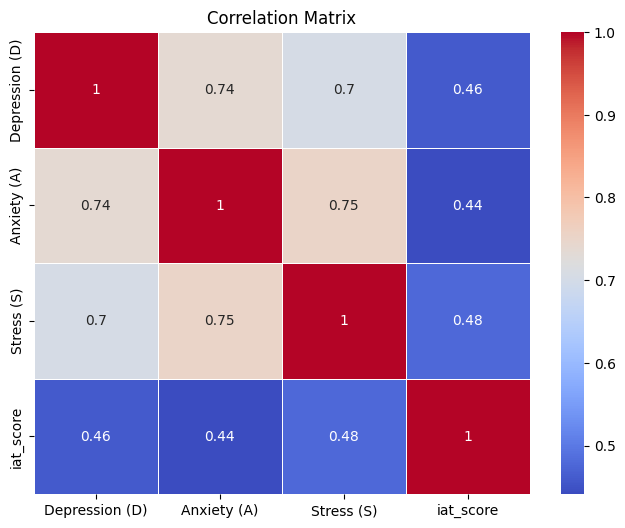

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df[['Depression (D)', 'Anxiety (A)', 'Stress (S)', 'iat_score']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the SVM model (Support Vector Regressor)
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate Mean Squared Error and R2 score
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVM Mean Squared Error: {mse_svm:.4f}")
print(f"SVM R2 Score: {r2_svm:.4f}")

SVM Mean Squared Error: 333.5801
SVM R2 Score: 0.2714


In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.8 MB/s eta 0:00:00


In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Example Data (Make sure 'df' contains X_train and y_train merged as a dataframe)
data = pd.concat([X_train, y_train], axis=1)

# Define Bayesian Network Structure
model = BayesianNetwork([('Depression (D)', 'iat_score'),
                         ('Stress (S)', 'iat_score'),
                         ('Anxiety (A)', 'iat_score')])

# Fit the model using Maximum Likelihood Estimation
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Predict on X_test (Example for making predictions)
# For Bayesian Networks, you'd use specific libraries to infer probabilities

# Evaluate (dummy prediction just as placeholder)
y_pred_bn = model.predict(X_test) # This is just an illustration, change according to the library
mse_bn = mean_squared_error(y_test, y_pred_bn)
r2_bn = r2_score(y_test, y_pred_bn)

print(f"Bayesian Network MSE: {mse_bn:.4f}")
print(f"Bayesian Network R2 Score: {r2_bn:.4f}")

  0%|          | 0/103 [00:00<?, ?it/s]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()


# Print the count of missing values in each column
print("Missing values in each column:")
print(missing_values)

# Optionally, if you want to drop rows with missing values
df_clean = df.dropna()


# Alternatively, you can fill missing values with the mean or median
# df_clean = df.fillna(df.mean())


Missing values in each column:
Sno                 0
Q1                  0
Q2                  0
Unnamed: 3        725
Q3                  0
                 ... 
Q2(21)              1
Depression (D)      1
Anxiety (A)         1
Stress (S)          1
iat_score           0
Length: 72, dtype: int64


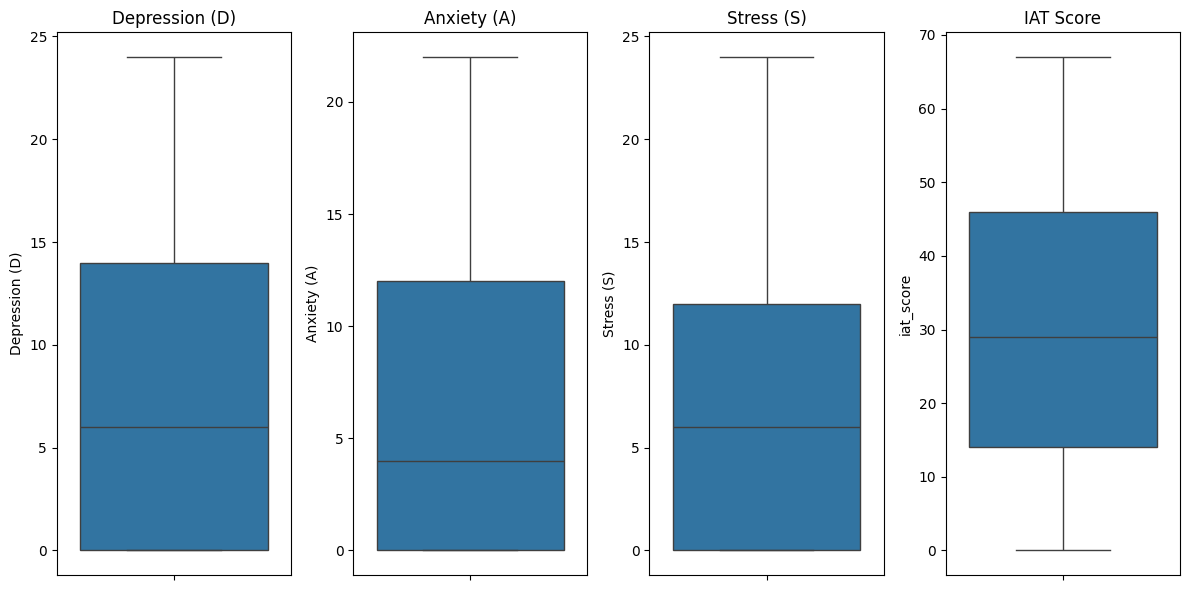

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for the input features (Depression, Anxiety, Stress) and the target (IAT score)
plt.figure(figsize=(12, 6))

# Boxplot for Depression
plt.subplot(1, 4, 1)
sns.boxplot(df_clean['Depression (D)'])
plt.title('Depression (D)')

# Boxplot for Anxiety
plt.subplot(1, 4, 2)
sns.boxplot(df_clean['Anxiety (A)'])
plt.title('Anxiety (A)')

# Boxplot for Stress
plt.subplot(1, 4, 3)
sns.boxplot(df_clean['Stress (S)'])
plt.title('Stress (S)')

# Boxplot for IAT Score
plt.subplot(1, 4, 4)
sns.boxplot(df_clean['iat_score'])
plt.title('IAT Score')

plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats

# Calculate Z-scores for each feature
z_scores = np.abs(stats.zscore(df[['Depression (D)', 'Anxiety (A)', 'Stress (S)', 'iat_score']]))

# Identify rows where the Z-score is greater than 3 (potential outliers)
outliers = np.where(z_scores > 3)

# Print the indices of potential outliers
print("Outlier indices:")
print(outliers)

# Optionally, you can remove the outliers from the dataset
df_clean = df[(z_scores < 3).all(axis=1)]


KeyError: "['iat_score'] not in index"

In [ ]:
# Cap values at the 95th percentile
df_clean = df.copy()
for column in ['Depression (D)', 'Anxiety (A)', 'Stress (S)', 'iat_score']:
    upper_limit = df_clean[column].quantile(0.95)
    df_clean[column] = np.where(df_clean[column] > upper_limit, upper_limit, df_clean[column])


In [ ]:
X = df[['Depression (D)', 'Anxiety (A)', 'Stress (S)']]
y = df['iat_score']

In [ ]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the ANN model

model = Sequential()

In [ ]:


# Input layer + 1st hidden layer with 20 neurons
model.add(Dense(128, input_dim=3, activation='relu'))

# Add another hidden layer with 20 neurons
model.add(Dense(20, activation='relu'))
from keras.layers import Dropout
model.add(Dropout(0.5))

# Optional: Add more hidden layers if needed
model.add(Dense(15, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
model.compile(optimizer='rmsprop', loss='mean_squared_error')


In [ ]:
df.isnull()


,Sno,Q1,Q2,Unnamed: 3,Q3,Q4,Q5,Q6,Unnamed: 8,Unnamed: 9,...,Q2(16),Q2(17),Q2(18),Q2(19),Q2(20),Q2(21),Depression (D),Anxiety (A),Stress (S),iat_score
0,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,True,True,True,False
1,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
721,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
722,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
723,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(np.isnan(X_train_scaled).sum(), np.isnan(y_train).sum())


0 0


In [ ]:
# Train the model on the training data
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 1449.0790 - val_loss: 1311.0752
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1482.9644 - val_loss: 1307.6102
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1365.6193 - val_loss: 1303.7505
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1493.9078 - val_loss: 1296.9657
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1328.6807 - val_loss: 1285.1577
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1419.1401 - val_loss: 1267.6986
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1324.9991 - val_loss: 1241.5687
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1388.2250 - val_loss: 1200.3423
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1308.7231 - val_loss: 1134.6917
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1195.7802 - val_loss: 1029.8413
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1067.5239 - val_lo

In [ ]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions
predictions = model.predict(X_test_scaled)

# Print the predictions for the test set
print(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 367.0620 
Test Loss: 358.2397766113281
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[16.599407]
 [31.100384]
 [16.611343]
 [32.233677]
 [28.487452]
 [16.599407]
 [16.599407]
 [34.622673]
 [34.717636]
 [29.279524]
 [27.325201]
 [34.005226]
 [38.32373 ]
 [16.599407]
 [31.41978 ]
 [35.38469 ]
 [17.120722]
 [17.539492]
 [22.034357]
 [22.554344]
 [17.54088 ]
 [18.944847]
 [39.510002]
 [28.367975]
 [27.546572]
 [28.062193]
 [23.950888]
 [21.642763]
 [18.90964 ]
 [16.599407]
 [16.599405]
 [24.03947 ]
 [35.523968]
 [16.61897 ]
 [16.599407]
 [16.599407]
 [16.599407]
 [30.045036]
 [36.001072]
 [22.801197]
 [18.445065]
 [17.66385 ]
 [23.024143]
 [32.683937]
 [16.599407]
 [16.67085 ]
 [30.8449  ]
 [27.804394]
 [32.781677]
 [16.599407]
 [16.59849 ]
 [36.621986]
 [37.127964]
 [16.599407]
 [28.886232]
 [36.070778]
 [35.860104]
 [16.646318]
 [32.27413 ]
 [24.919132]
 [24.690762]
 [24.713644]
 [16.503065]
 [18.274923]
 [31.67227 ]
 [33.479946]
 [16.599407]
 [37.08

In [ ]:
!pip install scikeras

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
def create_model(neurons=20, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=3, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Output layer for regression
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [ ]:
model = KerasRegressor(build_fn=create_model, verbose=0,learning_rate=0.001)

# Step 3: Define the parameter grid
param_grid = {
    'neurons': [20, 40, 60],           # Try different numbers of neurons
    'batch_size': [16, 32, 64],        # Try different batch sizes
    'epochs': [50, 100, 150],          # Try different numbers of epochs
    'learning_rate': [0.001, 0.01, 0.1]  # Try different learning rates
}

# Step 4: Implement GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Step 5: Fit the model (on your scaled data)
grid_result = grid.fit(X_train_scaled, y_train)

# Step 6: Output the best parameters and the best score
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

ValueError: Invalid parameter neurons for estimator KerasRegressor.
This issue can likely be resolved by setting this parameter in the KerasRegressor constructor:
`KerasRegressor(neurons=20)`
Check the list of available parameters with `estimator.get_params().keys()`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)



Text(0, 0.5, 'Stress Scores')

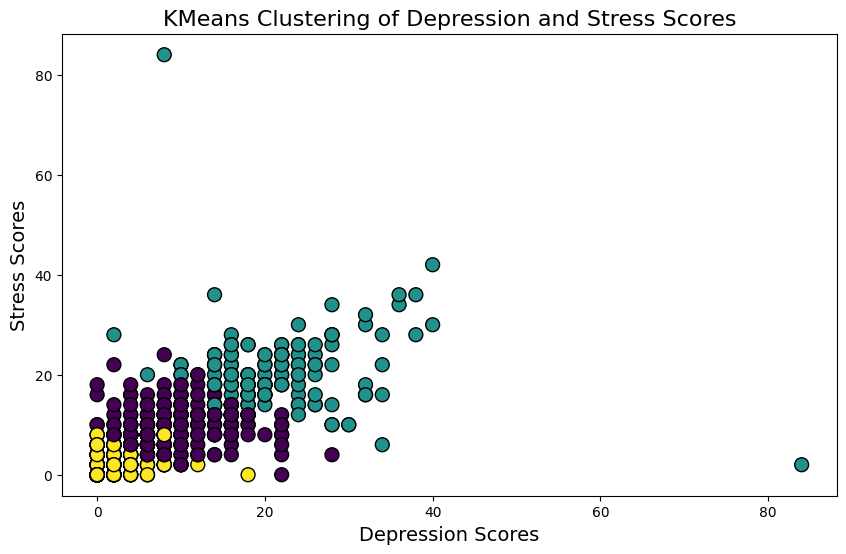

In [ ]:
# Step 3: Plot the clusters (using 'depression' and 'stress' for 2D plot)
plt.figure(figsize=(10, 6))
plt.scatter(df['Depression (D)'], df['Stress (S)'], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k', s=100)

# Add labels and title
plt.title('KMeans Clustering of Depression and Stress Scores', fontsize=16)
plt.xlabel('Depression Scores', fontsize=14)
plt.ylabel('Stress Scores', fontsize=14)

In [ ]:
# Step 3: Dimensionality Reduction (Optional for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

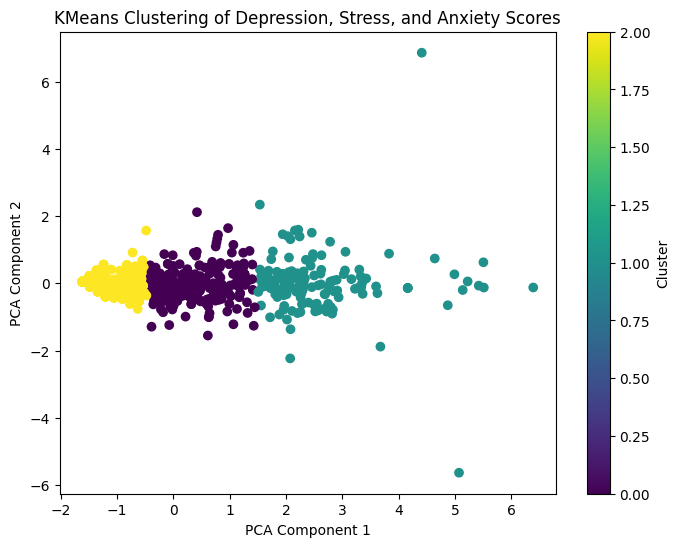

In [ ]:


# Step 4: Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('KMeans Clustering of Depression, Stress, and Anxiety Scores')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

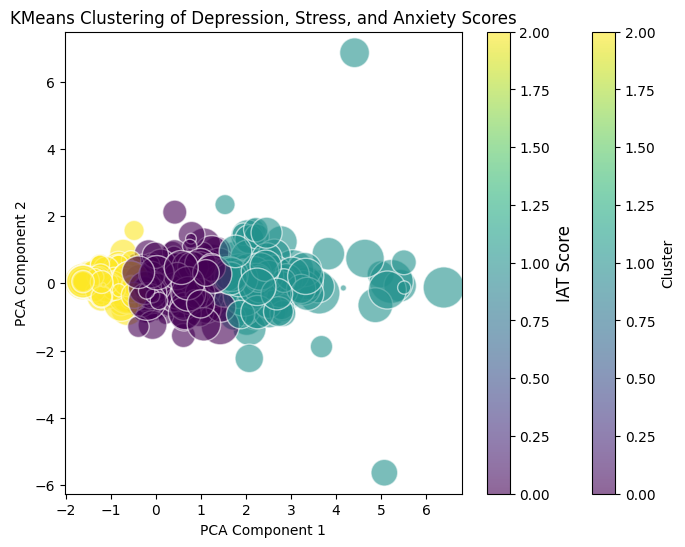

In [ ]:
# Step 4: Plotting the clusters with IAT scores as point sizes
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'],
                      s=df['iat_score']*10,  # Size of points based on IAT scores
                      cmap='viridis', alpha=0.6, edgecolors='w')

plt.title('KMeans Clustering of Depression, Stress, and Anxiety Scores')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')

# Add a color legend for IAT scores
cbar = plt.colorbar(scatter)
cbar.set_label('IAT Score', fontsize=12)

plt.show()

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
#Separate features (depression, stress, anxiety) and target (iat_score)
X = df[['Depression (D)', 'Anxiety (A)', 'Stress (S)']]
y = df['iat_score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

In [ ]:
# Train both models
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Get predictions
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

# Weighted average ensemble (adjust weights as needed)
weight_rf = 0.6
weight_xgb = 0.4
ensemble_pred = (weight_rf * rf_pred) + (weight_xgb * xgb_pred)

# Evaluate the ensemble model
mse = mean_squared_error(y_test, ensemble_pred)
print("Mean Squared Error of Ensemble:", mse)

Mean Squared Error of Ensemble: 343.1559268178249


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

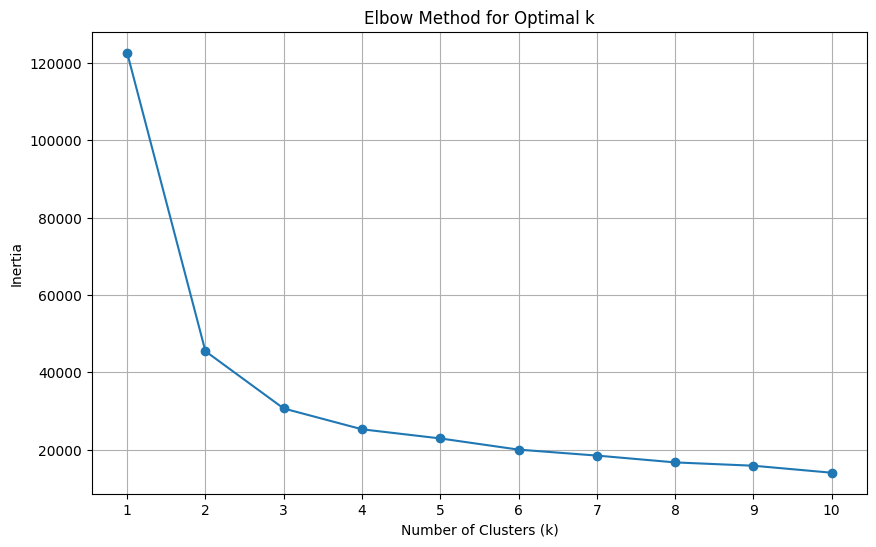

In [ ]:
# Step 1: Calculate inertia for different numbers of clusters
inertia_values = []
k_values = range(1, 11)  # Testing k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)  # Append inertia for each k

# Step 2: Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
# Step 1: Apply Clustering
# Use KMeans clustering
num_clusters = 5 # Adjust based on the dataset's distribution and trial-and-error
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters  # Add cluster labels to the original DataFrame for reference

# Step 2: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Depression (D)', y='Anxiety (A)', hue='Cluster', palette='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("Clustering on Depression, Anxiety, and Stress")
plt.legend()
plt.show()

ValueError: Length of values (711) does not match length of index (724)

In [ ]:
df['Cluster'].value_counts()

,count
Cluster,
2,272
0,185
4,128
1,119
3,20


In [ ]:
# remove third cluster
df_filtered = df[df['Cluster'] != 3]

In [ ]:
X_filtered = df_filtered[['Depression (D)', 'Anxiety (A)', 'Stress (S)']]
y_filtered = df_filtered['iat_score']

In [ ]:
# Step 1: Remove the third cluster from the DataFrame
df_filtered = df[df['Cluster'] != 3].reset_index(drop=True)

# Step 2: Define your features and target variable again
X_filtered = df_filtered[['Depression (D)', 'Anxiety (A)', 'Stress (S)']]
y_filtered = df_filtered['iat_score']



# Update the clusters to reflect the remaining DataFrame
clusters = df_filtered['Cluster'].values  # Get clusters from filtered DataFrame

# Step 3: Train separate models for each cluster in the filtered DataFrame
models = {}
mse_scores = []
num_clusters = len(set(clusters))  # Update to reflect the number of remaining clusters

for cluster in range(num_clusters):
    # Filter data for the current cluster
    X_cluster = X_filtered[clusters == cluster]
    y_cluster = y_filtered[clusters == cluster]

    # Check if the cluster has any samples
    if len(X_cluster) == 0:
        print(f"Cluster {cluster} has no samples. Skipping.")
        continue

    # Split the cluster data into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Train a separate model for each cluster, e.g., RandomForestRegressor
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    models[cluster] = model  # Store the model for future predictions

    # Predict on the test set and calculate MSE for the current cluster
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Cluster {cluster} - Mean Squared Error: {mse}")


KeyError: 'Cluster'

In [ ]:
# Step 3: Train separate models for each cluster
models = {}
mse_scores = []
for cluster in range(num_clusters):
    # Filter data for the current cluster
    X_cluster = X[clusters == cluster]
    y_cluster = y[clusters == cluster]

    # Split the cluster data into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Train a separate model for each cluster, e.g., RandomForestRegressor
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    models[cluster] = model  # Store the model for future predictions

    # Predict on the test set and calculate MSE for the current cluster
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Cluster {cluster} - Mean Squared Error: {mse}")

KeyError: False

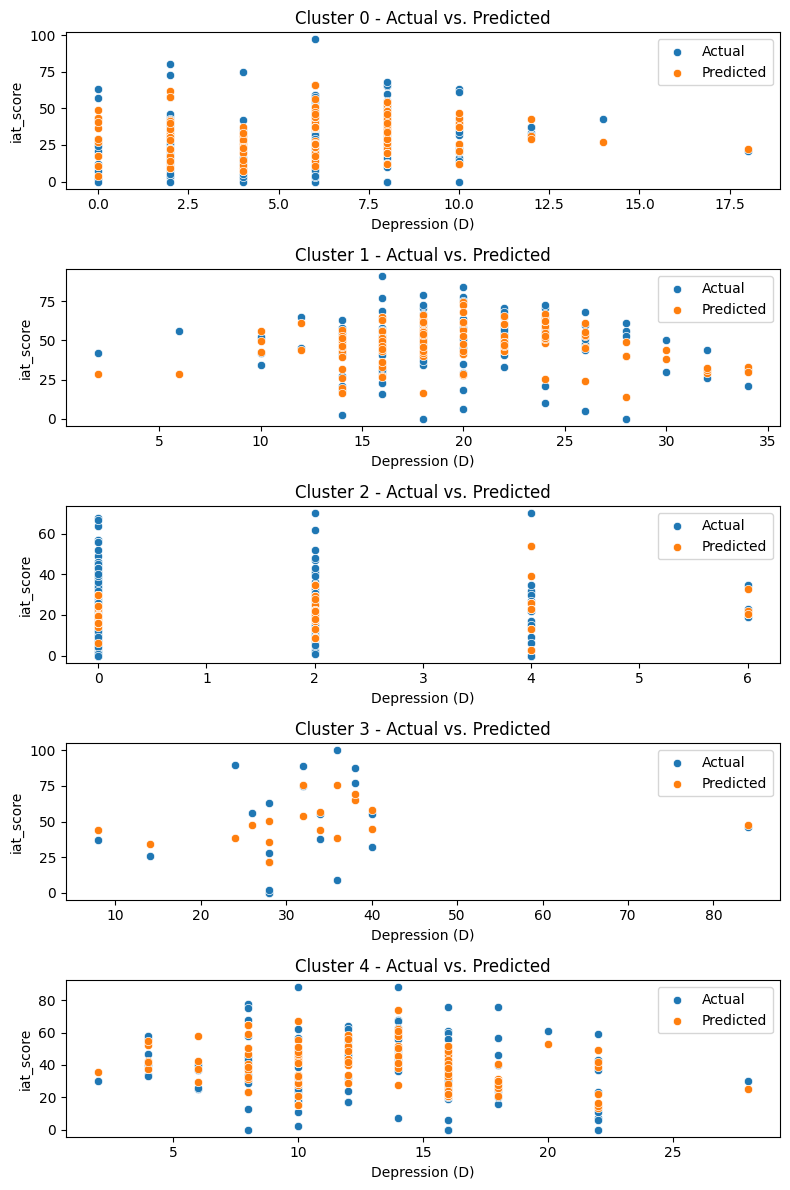

In [ ]:
fig, axes = plt.subplots(num_clusters, 1, figsize=(8, 12))
for cluster in range(num_clusters):
    ax = axes[cluster]
    sns.scatterplot(data=df[df['Cluster'] == cluster], x='Depression (D)', y='iat_score', label='Actual', ax=ax)
    sns.scatterplot(x=df[df['Cluster'] == cluster]['Depression (D)'], y=models[cluster].predict(df[df['Cluster'] == cluster][['Depression (D)', 'Anxiety (A)', 'Stress (S)']]), label='Predicted', ax=ax)
    ax.set_title(f"Cluster {cluster} - Actual vs. Predicted")
plt.tight_layout()
plt.show()

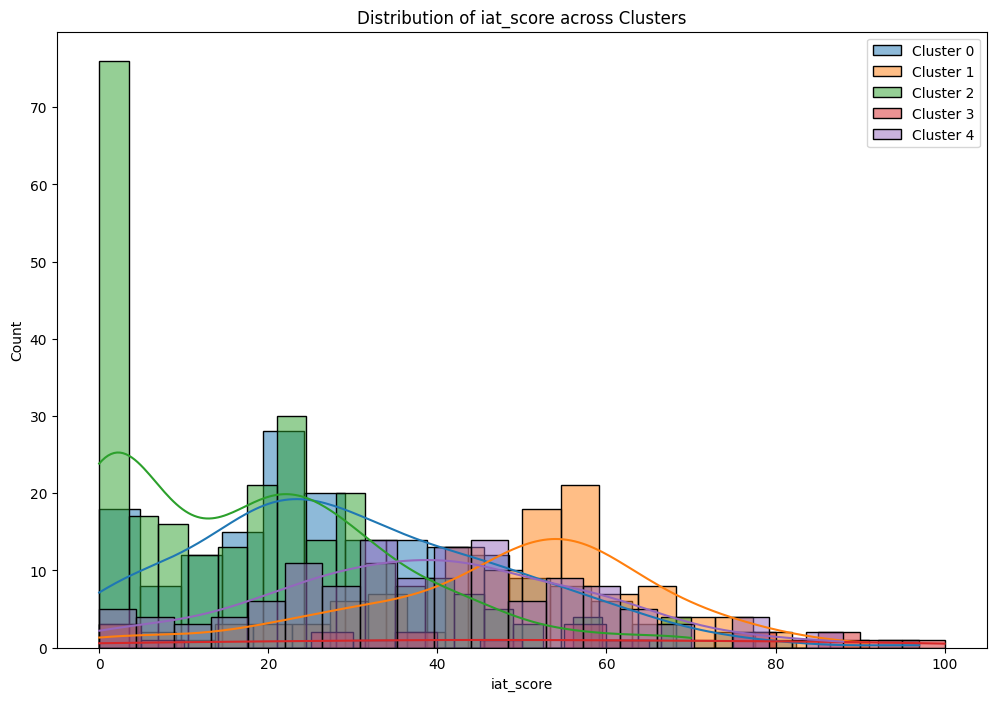

In [ ]:
# Step 1: Plot distribution of iat_score for each cluster
plt.figure(figsize=(12, 8))
for cluster in range(num_clusters):
    sns.histplot(df[df['Cluster'] == cluster]['iat_score'], kde=True, label=f'Cluster {cluster}', bins=20)
plt.xlabel('iat_score')
plt.title('Distribution of iat_score across Clusters')
plt.legend()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [ ]:
# Step 2: Try Gaussian Mixture Model (GMM) for clustering
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_clusters = gmm.fit_predict(X)
df['GMM_Cluster'] = gmm_clusters
num_cluster=5

In [ ]:
# Step 3: Re-evaluate using GMM clusters if distributions seem more appropriate
# Re-train and evaluate models for each GMM cluster if needed
mse_scores_gmm = []
for cluster in range(num_cluster):
    X_cluster = X[gmm_clusters == cluster]
    y_cluster = y[gmm_clusters == cluster]

    # Train-test split for each cluster
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Choose model per cluster; initially use RandomForestRegressor or others based on distribution
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores_gmm.append(mse)
    print(f"GMM Cluster {cluster} - Mean Squared Error: {mse}")

overall_mse_gmm = np.mean(mse_scores_gmm)
print("Overall Mean Squared Error using GMM clusters:", overall_mse_gmm)

GMM Cluster 0 - Mean Squared Error: 209.38026425588572
GMM Cluster 1 - Mean Squared Error: 496.5124773813035
GMM Cluster 2 - Mean Squared Error: 456.77545662925723
GMM Cluster 3 - Mean Squared Error: 348.01225000000005
GMM Cluster 4 - Mean Squared Error: 453.81579018612445
GMM Cluster 5 - Mean Squared Error: 179.04959999999988
Overall Mean Squared Error using GMM clusters: 357.2576397420951


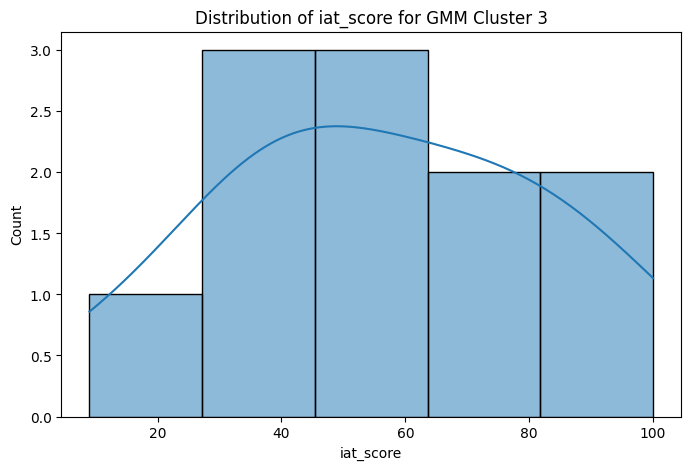

In [ ]:
# Visualize iat_score distribution specifically for Cluster 3
plt.figure(figsize=(8, 5))
sns.histplot(df[df['GMM_Cluster'] == 3]['iat_score'], kde=True)
plt.title("Distribution of iat_score for GMM Cluster 3")
plt.xlabel("iat_score")
plt.show()

In [ ]:
df['GMM_Cluster'].value_counts()

,count
GMM_Cluster,
1,218
2,172
4,170
0,147
3,9
5,8


In [ ]:
# Remove Cluster 3 and retrain models on remaining clusters
df_no_outliers = df[df['GMM_Cluster'] != 3]

overall_mse_no_outliers = []
for cluster in range(num_cluster):
    if cluster == 3:
        continue  # Skip Cluster 3 if treating it as outlier

    X_cluster = X[gmm_clusters == cluster]
    y_cluster = y[gmm_clusters == cluster]

    # Train-test split for each cluster
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Choose a model for each cluster; using RandomForestRegressor as an example
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    overall_mse_no_outliers.append(mse)
    print(f"GMM Cluster {cluster} - Mean Squared Error (without Cluster 3): {mse}")

# Calculate the overall MSE after excluding Cluster 3
average_mse_no_outliers = np.mean(overall_mse_no_outliers)
print("Overall Mean Squared Error after excluding Cluster 3:", average_mse_no_outliers)

GMM Cluster 0 - Mean Squared Error (without Cluster 3): 209.38026425588572
GMM Cluster 1 - Mean Squared Error (without Cluster 3): 496.5124773813035
GMM Cluster 2 - Mean Squared Error (without Cluster 3): 456.77545662925723
GMM Cluster 4 - Mean Squared Error (without Cluster 3): 453.81579018612445
GMM Cluster 5 - Mean Squared Error (without Cluster 3): 179.04959999999988
Overall Mean Squared Error after excluding Cluster 3: 359.10671769051413


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Remove Cluster 3 from the dataset
df_no_outliers = df[df['GMM_Cluster'] != 3]

overall_mse_no_outliers = []
for cluster in range(num_cluster):
    if cluster == 3:
        continue  # Skip Cluster 3 as it is treated as an outlier

    # Filter data for the current cluster
    X_cluster = X[gmm_clusters == cluster]
    y_cluster = y[gmm_clusters == cluster]

    # Train-test split for each cluster
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Train a linear regression model on each cluster
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and calculate MSE for each cluster
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    overall_mse_no_outliers.append(mse)
    print(f"GMM Cluster {cluster} - Mean Squared Error (without Cluster 3): {mse}")

# Calculate the overall MSE after excluding Cluster 3
average_mse_no_outliers = np.mean(overall_mse_no_outliers)
print("Overall Mean Squared Error after excluding Cluster 3:", average_mse_no_outliers)


GMM Cluster 0 - Mean Squared Error (without Cluster 3): 207.01949127535164
GMM Cluster 1 - Mean Squared Error (without Cluster 3): 328.9459885068412
GMM Cluster 2 - Mean Squared Error (without Cluster 3): 455.32153659593774
GMM Cluster 4 - Mean Squared Error (without Cluster 3): 286.45667315682493
Overall Mean Squared Error after excluding Cluster 3: 319.4359223837389


In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Remove Cluster 3 from the dataset
df_no_outliers = df[df['GMM_Cluster'] != 3]

# Lists to store MSEs for both models
overall_mse_svr = []
overall_mse_decision_tree = []

for cluster in range(num_cluster):
    if cluster == 3:
        continue  # Skip Cluster 3 as it is treated as an outlier

    # Filter data for the current cluster
    X_cluster = X[gmm_clusters == cluster]
    y_cluster = y[gmm_clusters == cluster]

    # Train-test split for each cluster
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Train an SVR model on each cluster
    svr_model = SVR()
    svr_model.fit(X_train, y_train)
    y_pred_svr = svr_model.predict(X_test)
    mse_svr = mean_squared_error(y_test, y_pred_svr)
    overall_mse_svr.append(mse_svr)
    print(f"GMM Cluster {cluster} - SVR Mean Squared Error (without Cluster 3): {mse_svr}")

    # Train a Decision Tree Regressor model on each cluster
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    mse_dt = mean_squared_error(y_test, y_pred_dt)
    overall_mse_decision_tree.append(mse_dt)
    print(f"GMM Cluster {cluster} - Decision Tree Mean Squared Error (without Cluster 3): {mse_dt}")

# Calculate the overall MSE for both models after excluding Cluster 3
average_mse_svr = np.mean(overall_mse_svr)
average_mse_decision_tree = np.mean(overall_mse_decision_tree)

print("Overall Mean Squared Error for SVR after excluding Cluster 3:", average_mse_svr)
print("Overall Mean Squared Error for Decision Tree after excluding Cluster 3:", average_mse_decision_tree)


GMM Cluster 0 - SVR Mean Squared Error (without Cluster 3): 228.01859096314448
GMM Cluster 0 - Decision Tree Mean Squared Error (without Cluster 3): 256.1094329931973
GMM Cluster 1 - SVR Mean Squared Error (without Cluster 3): 313.73332299654055
GMM Cluster 1 - Decision Tree Mean Squared Error (without Cluster 3): 492.47115384615387
GMM Cluster 2 - SVR Mean Squared Error (without Cluster 3): 588.7874831197599
GMM Cluster 2 - Decision Tree Mean Squared Error (without Cluster 3): 460.0038549562683
GMM Cluster 4 - SVR Mean Squared Error (without Cluster 3): 323.2136922191065
GMM Cluster 4 - Decision Tree Mean Squared Error (without Cluster 3): 446.4705387205387
Overall Mean Squared Error for SVR after excluding Cluster 3: 363.43827232463786
Overall Mean Squared Error for Decision Tree after excluding Cluster 3: 413.76374512903953


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Remove Cluster 3 from the dataset
df_no_outliers = df[df['GMM_Cluster'] != 3]

overall_mse_no_outliers = []
for cluster in range(num_cluster):
    if cluster == 3:
        continue  # Skip Cluster 3 as it is treated as an outlier

    # Filter data for the current cluster
    X_cluster = X[gmm_clusters == cluster]
    y_cluster = y[gmm_clusters == cluster]

    # Train-test split for each cluster
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Train an XGBRegressor model on each cluster
    model = XGBRegressor(objective='reg:squarederror', random_state=42)
    model.fit(X_train, y_train)

    # Predict and calculate MSE for each cluster
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    overall_mse_no_outliers.append(mse)
    print(f"GMM Cluster {cluster} - Mean Squared Error (without Cluster 3): {mse}")

# Calculate the overall MSE after excluding Cluster 3
average_mse_no_outliers = np.mean(overall_mse_no_outliers)
print("Overall Mean Squared Error after excluding Cluster 3:", average_mse_no_outliers)


GMM Cluster 0 - Mean Squared Error (without Cluster 3): 233.43104686228807
GMM Cluster 1 - Mean Squared Error (without Cluster 3): 373.9551506570241
GMM Cluster 2 - Mean Squared Error (without Cluster 3): 460.0028522628134
GMM Cluster 4 - Mean Squared Error (without Cluster 3): 385.1467709284252
Overall Mean Squared Error after excluding Cluster 3: 363.1339551776377


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Filter out Cluster 3
df_no_outliers = df[df['GMM_Cluster'] != 3]
X_no_outliers = df_no_outliers[['Depression (D)', 'Anxiety (A)', 'Stress (S)']]
y_no_outliers = df_no_outliers['iat_score']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Step 3: Train a RandomForestRegressor model (you can try other models too)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions and calculate MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error after removing outliers (Cluster 3):", mse)


Mean Squared Error after removing outliers (Cluster 3): 322.75902775660336


In [ ]:
from xgboost import XGBRegressor

# Train an XGBRegressor model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions and calculate MSE
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error with XGBRegressor after removing outliers:", mse_xgb)


Mean Squared Error with XGBRegressor after removing outliers: 398.8754746585146


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
GMM Cluster 0 - Mean Squared Error with Deep ANN (without Cluster 3): 243.1785817135008


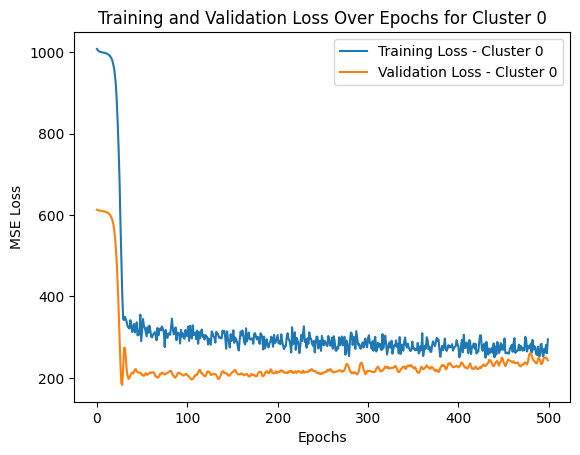

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
GMM Cluster 1 - Mean Squared Error with Deep ANN (without Cluster 3): 493.78087719142246


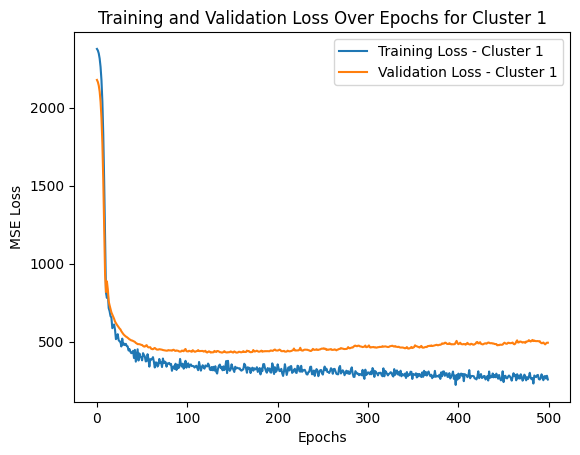

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
GMM Cluster 2 - Mean Squared Error with Deep ANN (without Cluster 3): 460.1772393213511


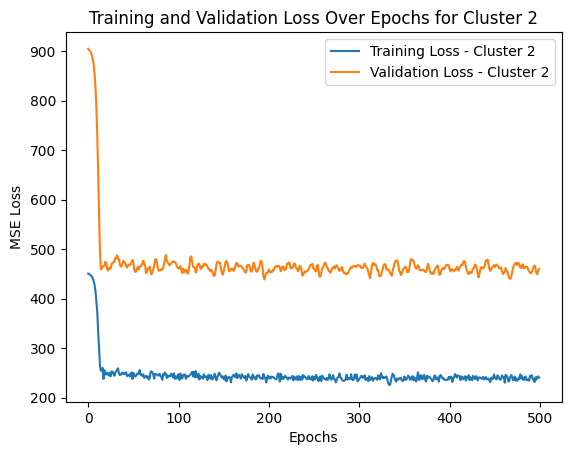

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
GMM Cluster 4 - Mean Squared Error with Deep ANN (without Cluster 3): 418.1030084044367


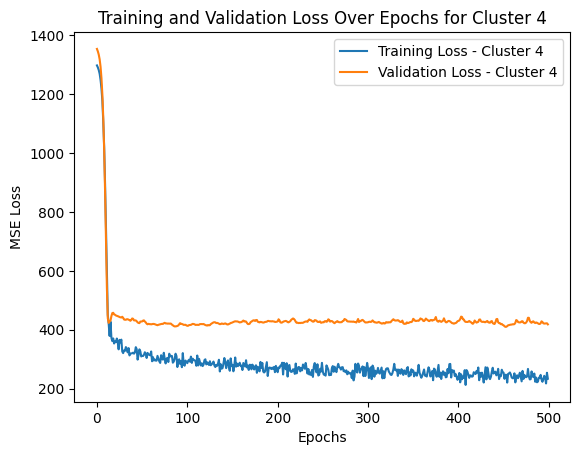

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
GMM Cluster 5 - Mean Squared Error with Deep ANN (without Cluster 3): 17332.368358679232


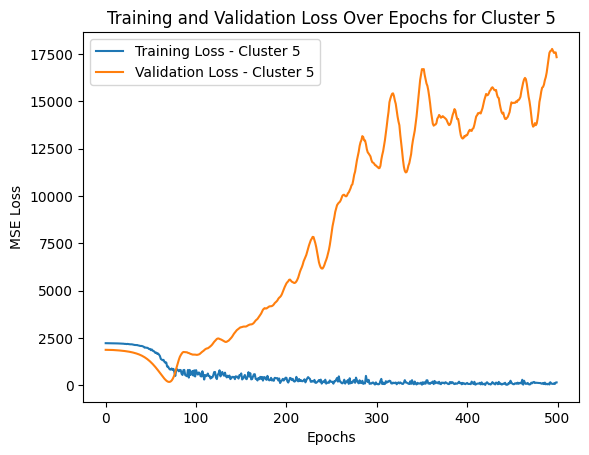

Overall Mean Squared Error with Deep ANN after excluding Cluster 3: 3789.5216130619883


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Remove Cluster 3
df_no_outliers = df[df['GMM_Cluster'] != 3]

# Dictionary to store MSE for each cluster
cluster_mse = {}

# Iterate through each cluster and train a separate model
for cluster in range(num_cluster):
    if cluster == 3:
        continue  # Skip Cluster 3 as it is treated as an outlier

    # Filter data for the current cluster
    cluster_data = df_no_outliers[df_no_outliers['GMM_Cluster'] == cluster]
    X_cluster = cluster_data[['Depression (D)', 'Anxiety (A)', 'Stress (S)']]
    y_cluster = cluster_data['iat_score']

    # Train-test split for the current cluster
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build the ANN model for the current cluster
    model = Sequential([
        Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1)  # Single output for regression
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                        epochs=500, batch_size=32, verbose=0)

    # Evaluate the model and store the MSE for the cluster
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    cluster_mse[cluster] = mse
    print(f"GMM Cluster {cluster} - Mean Squared Error with Deep ANN (without Cluster 3): {mse}")

    # Plot training and validation loss for each cluster
    plt.plot(history.history['loss'], label=f'Training Loss - Cluster {cluster}')
    plt.plot(history.history['val_loss'], label=f'Validation Loss - Cluster {cluster}')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.title(f'Training and Validation Loss Over Epochs for Cluster {cluster}')
    plt.show()

# Calculate and display the overall average MSE across clusters (excluding Cluster 3)
average_mse_no_outliers = np.mean(list(cluster_mse.values()))
print("Overall Mean Squared Error with Deep ANN after excluding Cluster 3:", average_mse_no_outliers)


In [ ]:
df['iat_score'].describe()

,iat_score
count,724.000000
mean,30.674033
std,21.532537
min,0.000000
25%,14.000000
50%,29.000000
75%,46.000000
max,100.000000


In [ ]:
df_filtered['iat_score'].value_counts()

,count
iat_score,
20.0,18
32.0,18
2.0,16
23.0,16
56.0,16
...,...
65.0,5
60.0,5
50.0,5


In [ ]:
# Counting occurrences of each score
value_counts = df['iat_score'].value_counts()

# Finding counts of elements with less than 5 occurrences
counts_less_than_5 = value_counts[value_counts < 5]

# Get the unique scores with less than 5 occurrences
unique_scores_less_than_5 = counts_less_than_5.index  # These are the iat_scores with less than 5 occurrences

# Calculate the total count of all occurrences for scores with less than 5
total_count = counts_less_than_5.sum()  # This sums the counts of those scores

# Remove these rows from the DataFrame
df_filtered = df[~df['iat_score'].isin(unique_scores_less_than_5)]  # Keep rows where iat_score is not in counts_less_than_5

# Print the results
print("Number of unique scores with less than 5 occurrences:", len(counts_less_than_5))
print("Total occurrences of these scores:", total_count)  # Print total occurrences of these scores
print("Filtered DataFrame shape:", df_filtered.shape)


Number of unique scores with less than 5 occurrences: 22
Total occurrences of these scores: 47
Filtered DataFrame shape: (677, 74)


In [ ]:
df_filtered = df_filtered[df_filtered['iat_score'] != 0]

In [ ]:
!pip install pandas numpy imbalanced-learn


In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
# Define features and target variable
X = df_filtered[['Depression (D)', 'Anxiety (A)', 'Stress (S)']]
y = df_filtered['iat_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train for SMOTE
train_data = pd.concat([X_train, y_train], axis=1)

# Check the distribution of the target variable
print("Original Target Distribution:")
print(train_data['iat_score'].value_counts())

# Apply SMOTE with adjusted k_neighbors
smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)  # Set k_neighbors to 1
X_resampled, y_resampled = smote.fit_resample(train_data.drop('iat_score', axis=1), train_data['iat_score'])

# Combine the resampled data into a new DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=['Depression (D)', 'Anxiety (A)', 'Stress (S)'])
resampled_data['iat_score'] = y_resampled

# Show the result
print("\nResampled Data Distribution:")
print(resampled_data['iat_score'].value_counts())

Original Target Distribution:
iat_score
0.0     56
2.0     15
21.0    15
20.0    13
56.0    13
        ..
79.0     1
84.0     1
80.0     1
69.0     1
97.0     1
Name: count, Length: 83, dtype: int64


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 2, n_samples_fit = 1, n_samples = 1

<ipython-input-36-3ffc3acd9e63>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col).apply(filter_group).reset_index(drop=True)


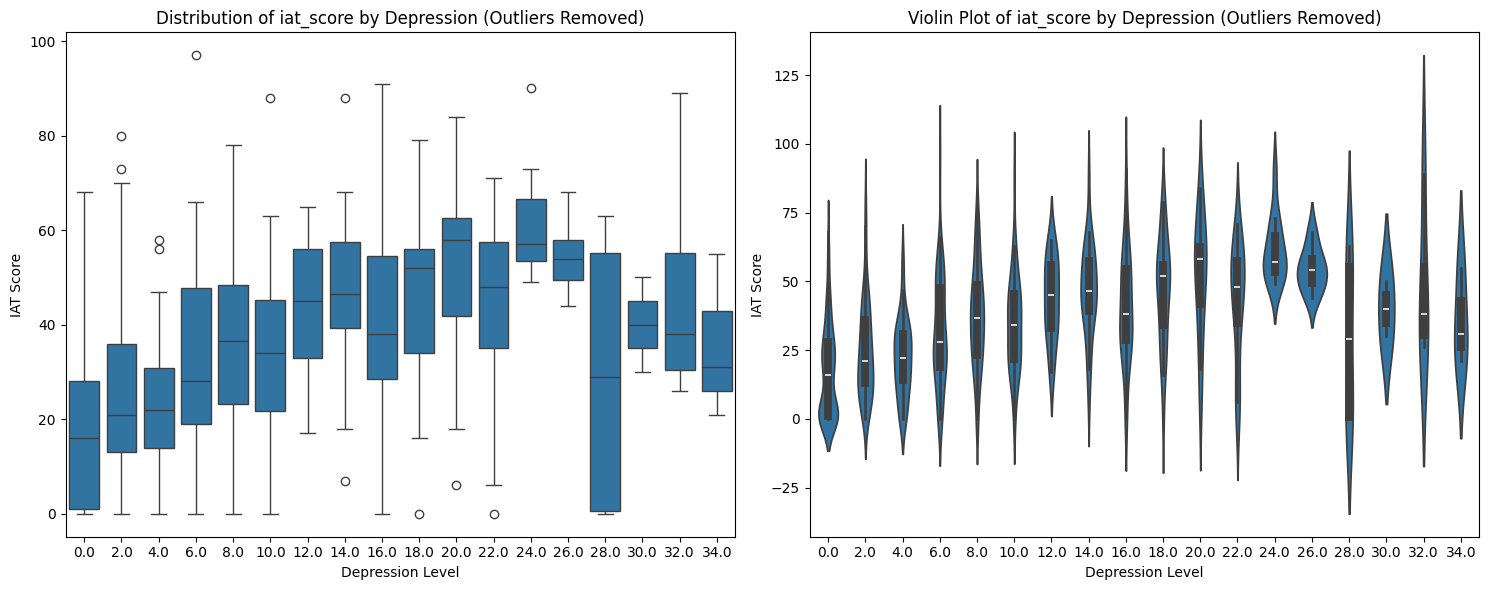

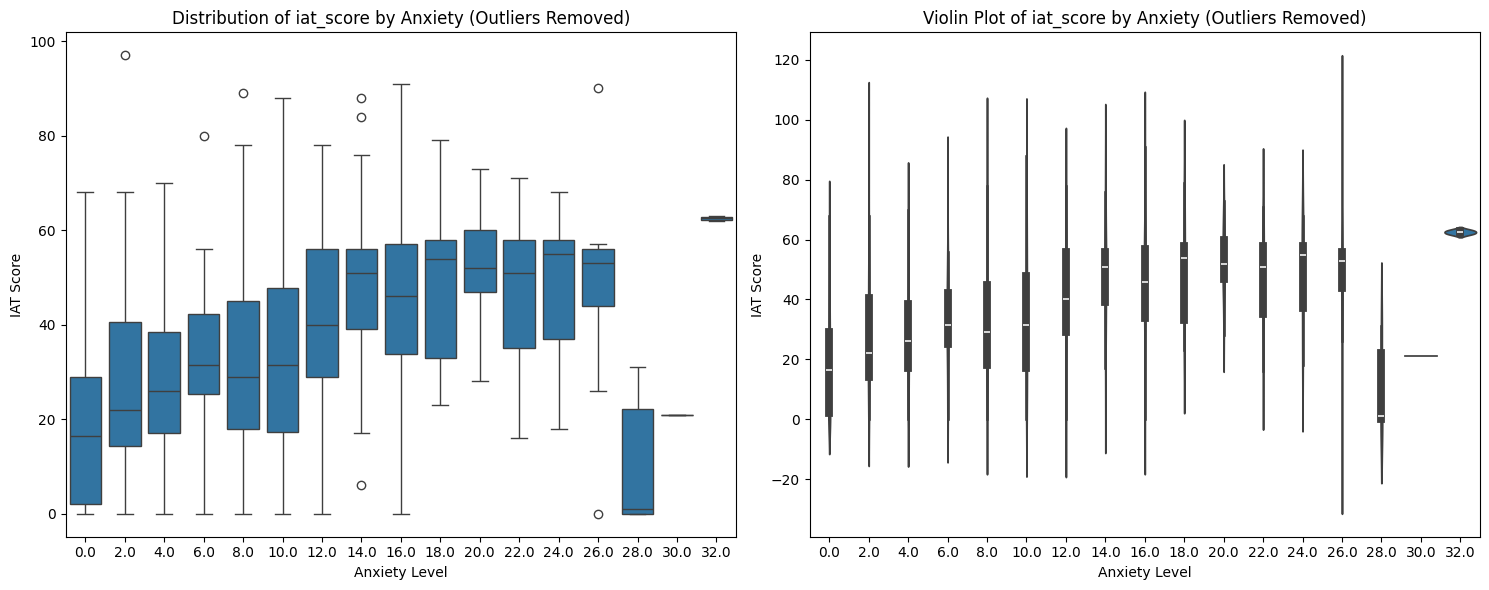

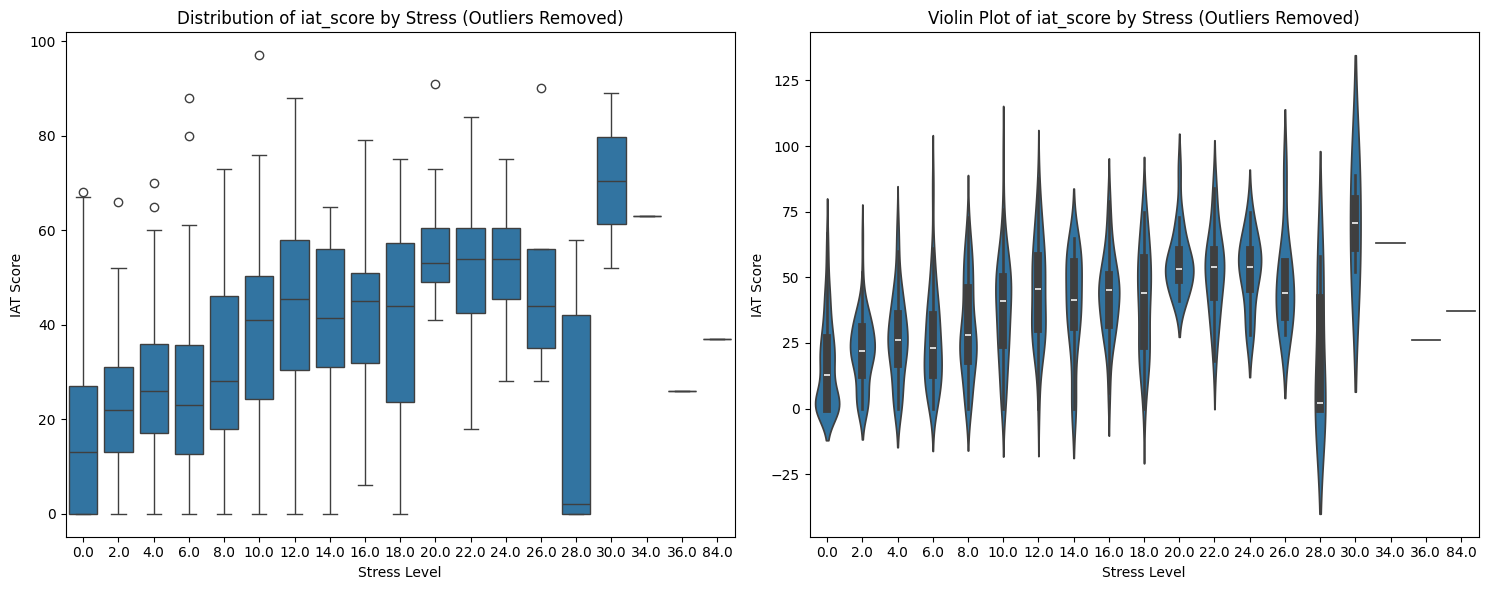

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def remove_group_outliers(df, group_col, target_col, multiplier=1.5):
    def filter_group(group):
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        return group[(group[target_col] >= lower_bound) & (group[target_col] <= upper_bound)]

    return df.groupby(group_col).apply(filter_group).reset_index(drop=True)
# Remove outliers in iat_score for plotting
df_cleaned = remove_group_outliers(df_no_outliers,'Depression (D)', 'iat_score',multiplier=2)

# Plotting distribution after removing statistical outliers

# Boxplot and Violin plot for Depression vs. IAT Score
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Depression (D)', y='iat_score', data=df_cleaned)
plt.title('Distribution of iat_score by Depression (Outliers Removed)')
plt.xlabel('Depression Level')
plt.ylabel('IAT Score')

plt.subplot(1, 2, 2)
sns.violinplot(x='Depression (D)', y='iat_score', data=df_cleaned)
plt.title('Violin Plot of iat_score by Depression (Outliers Removed)')
plt.xlabel('Depression Level')
plt.ylabel('IAT Score')

plt.tight_layout()
plt.show()

# Repeat for Anxiety and Stress

# Boxplot and Violin plot for Anxiety vs. IAT Score
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Anxiety (A)', y='iat_score', data=df_cleaned)
plt.title('Distribution of iat_score by Anxiety (Outliers Removed)')
plt.xlabel('Anxiety Level')
plt.ylabel('IAT Score')

plt.subplot(1, 2, 2)
sns.violinplot(x='Anxiety (A)', y='iat_score', data=df_cleaned)
plt.title('Violin Plot of iat_score by Anxiety (Outliers Removed)')
plt.xlabel('Anxiety Level')
plt.ylabel('IAT Score')

plt.tight_layout()
plt.show()

# Boxplot and Violin plot for Stress vs. IAT Score
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Stress (S)', y='iat_score', data=df_cleaned)
plt.title('Distribution of iat_score by Stress (Outliers Removed)')
plt.xlabel('Stress Level')
plt.ylabel('IAT Score')

plt.subplot(1, 2, 2)
sns.violinplot(x='Stress (S)', y='iat_score', data=df_cleaned)
plt.title('Violin Plot of iat_score by Stress (Outliers Removed)')
plt.xlabel('Stress Level')
plt.ylabel('IAT Score')

plt.tight_layout()
plt.show()


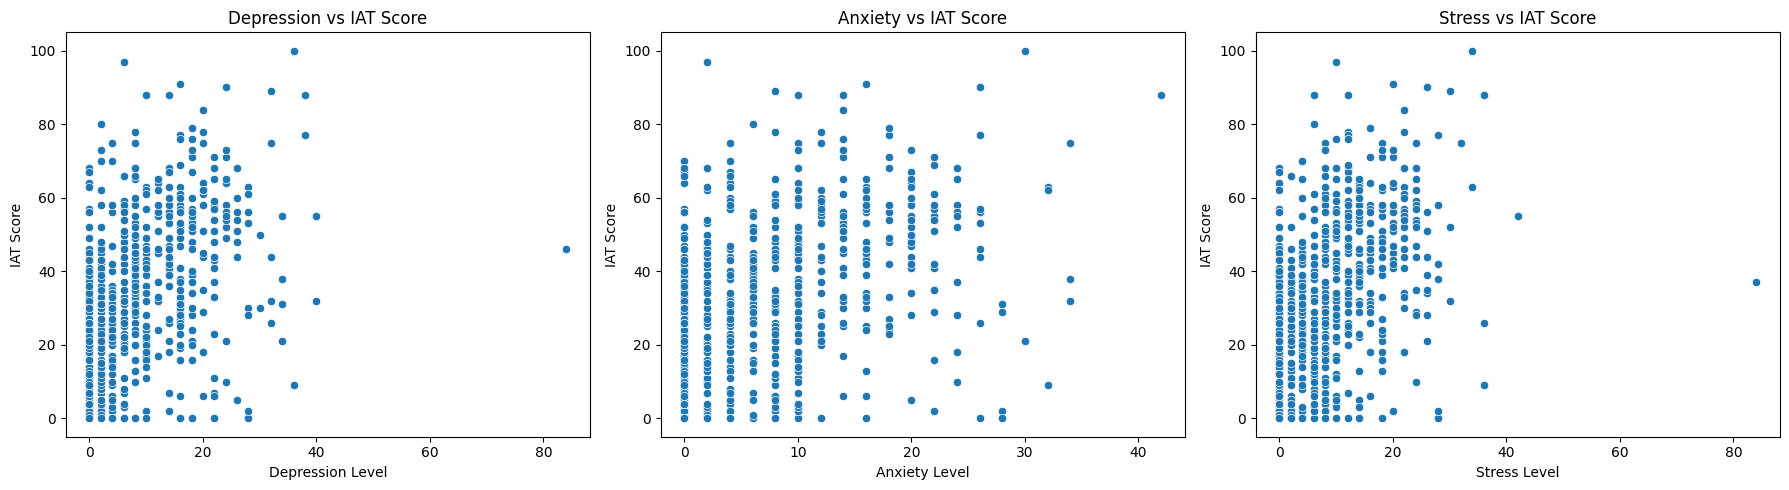

In [ ]:
# Set up the figure size for each subplot
plt.figure(figsize=(18, 5))

# Depression vs IAT Score
plt.subplot(1, 3, 1)
sns.scatterplot(x='Depression (D)', y='iat_score', data=df)
plt.title('Depression vs IAT Score')
plt.xlabel('Depression Level')
plt.ylabel('IAT Score')

# Anxiety vs IAT Score
plt.subplot(1, 3, 2)
sns.scatterplot(x='Anxiety (A)', y='iat_score', data=df)
plt.title('Anxiety vs IAT Score')
plt.xlabel('Anxiety Level')
plt.ylabel('IAT Score')

# Stress vs IAT Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='Stress (S)', y='iat_score', data=df)
plt.title('Stress vs IAT Score')
plt.xlabel('Stress Level')
plt.ylabel('IAT Score')

# Display all plots
plt.tight_layout()
plt.show()


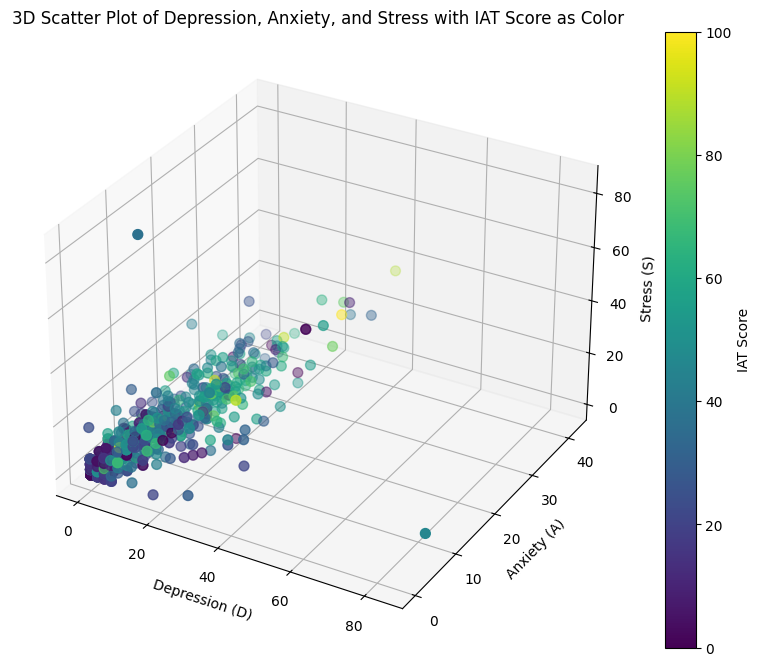

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Normalize iat_score for color mapping
norm = plt.Normalize(df['iat_score'].min(), df['iat_score'].max())
colors = plt.cm.viridis(norm(df['iat_score']))

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['Depression (D)'], df['Anxiety (A)'], df['Stress (S)'], c=colors, s=50)

# Add color bar
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax)
cbar.set_label('IAT Score')

# Labels
ax.set_xlabel('Depression (D)')
ax.set_ylabel('Anxiety (A)')
ax.set_zlabel('Stress (S)')
plt.title('3D Scatter Plot of Depression, Anxiety, and Stress with IAT Score as Color')

plt.show()


In [ ]:
import plotly.express as px

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(df,
                    x='Depression (D)',
                    y='Anxiety (A)',
                    z='Stress (S)',
                    color='iat_score',
                    color_continuous_scale='Viridis',
                    title='3D Scatter Plot of Depression, Anxiety, and Stress with IAT Score as Color',
                    labels={
                        'Depression (D)': 'Depression',
                        'Anxiety (A)': 'Anxiety',
                        'Stress (S)': 'Stress',
                        'iat_score': 'IAT Score'
                    })

fig.update_layout(scene=dict(
                    xaxis_title='Depression (D)',
                    yaxis_title='Anxiety (A)',
                    zaxis_title='Stress (S)'))

fig.show()


In [ ]:
import pandas as pd
import numpy as np

def remove_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

def replace_outliers_with_mean(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate the mean
    mean_value = df[column].mean()

    # Replace outliers with the mean
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), mean_value, df[column])
    return df

# Assuming df_filtered is your DataFrame after removing rows with 0 iat_score
# Remove outliers from the relevant columns
df_filtered_no_outliers = remove_outliers(df_filtered, 'iat_score')

# Alternatively, replace outliers with the mean
df_filtered_replaced = replace_outliers_with_mean(df_filtered, 'iat_score')

# Display the results
print("DataFrame shape after removing outliers:", df_filtered_no_outliers.shape)
print("DataFrame shape after replacing outliers with mean:", df_filtered_replaced.shape)


DataFrame shape after removing outliers: (703, 74)
DataFrame shape after replacing outliers with mean: (704, 74)


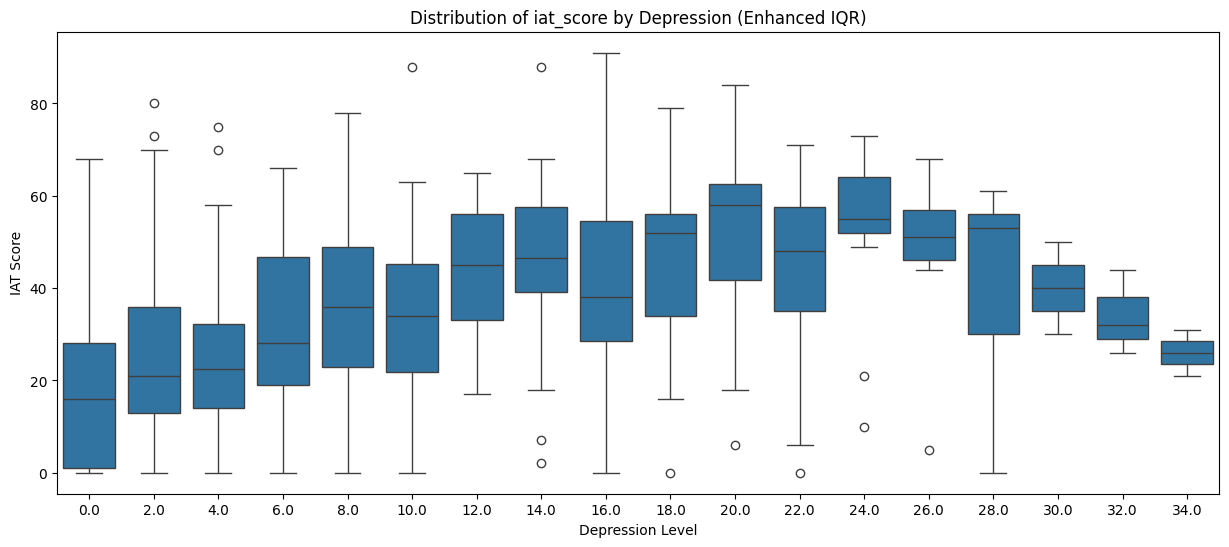

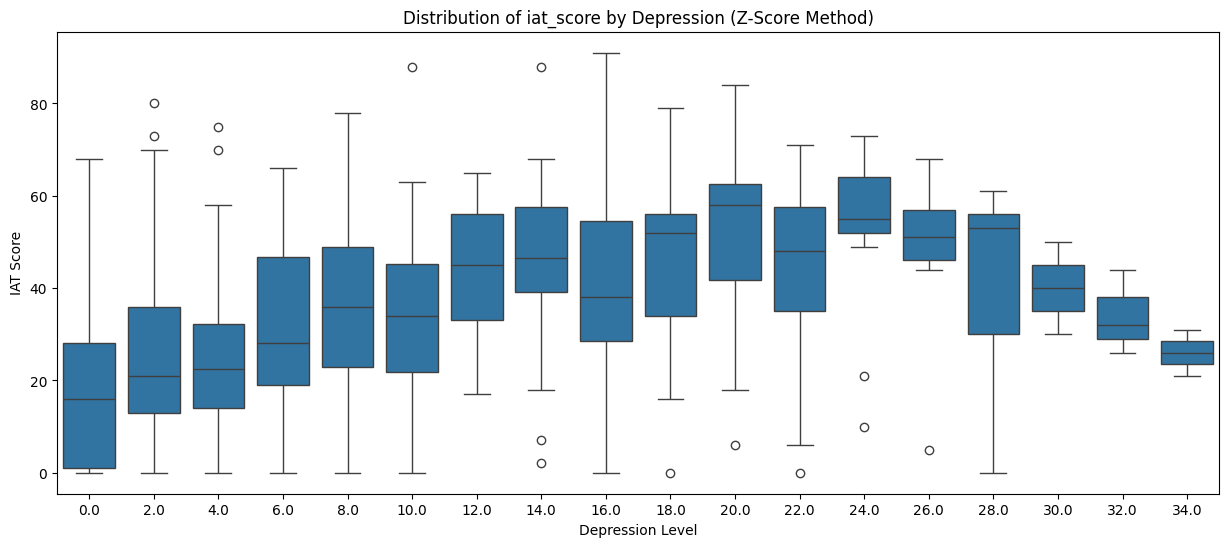

In [ ]:
from scipy import stats

def enhanced_remove_outliers_iqr(df, column, multiplier=1.5):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Remove outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

def z_score_outliers(df, column, threshold=2):
    # Calculate Z-scores of the column
    z_scores = np.abs(stats.zscore(df[column]))

    # Filter out rows with Z-score greater than the threshold
    df_filtered = df[z_scores < threshold]
    return df_filtered

# Remove outliers using enhanced IQR method
df_filtered_iqr = enhanced_remove_outliers_iqr(df_filtered, 'iat_score', multiplier=2.0)

# Remove outliers using Z-score method
df_filtered_zscore = z_score_outliers(df_filtered, 'iat_score', threshold=3)

# Visualize the results
plt.figure(figsize=(15, 6))
sns.boxplot(x='Depression (D)', y='iat_score', data=df_filtered_iqr)
plt.title('Distribution of iat_score by Depression (Enhanced IQR)')
plt.xlabel('Depression Level')
plt.ylabel('IAT Score')
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='Depression (D)', y='iat_score', data=df_filtered_zscore)
plt.title('Distribution of iat_score by Depression (Z-Score Method)')
plt.xlabel('Depression Level')
plt.ylabel('IAT Score')
plt.show()


In [ ]:
df['iat_score'].describe()

,iat_score
count,724.000000
mean,30.674033
std,21.532537
min,0.000000
25%,14.000000
50%,29.000000
75%,46.000000
max,100.000000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Assuming df is your DataFrame and 'iat_score' is already created

# Step 1: Create classes based on iat_score
bins = [0, 14, 29, 46, 100]
labels = [1, 2, 3, 4]
df['iat_class'] = pd.cut(df['iat_score'], bins=bins, labels=labels, right=True)
df = df.dropna(subset=['Depression (D)', 'Anxiety (A)', 'Stress (S)', 'iat_class'])

# Step 2: Prepare features and target variable
X = df[['Depression (D)', 'Anxiety (A)', 'Stress (S)']]
y = df['iat_class']

# Encode target variable if it's categorical
# y = LabelEncoder().fit_transform(y)  # Uncomment if classes are not numeric

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train various machine learning models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),


    'Support Vector Machine': SVC()
}

# Fit models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f'--- {name} ---')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}\n')


--- Logistic Regression ---
Confusion Matrix:
[[ 0 32  0  4]
 [ 0 43  5  6]
 [ 0 24 12 12]
 [ 0 12 11 35]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        36
           2       0.39      0.80      0.52        54
           3       0.43      0.25      0.32        48
           4       0.61      0.60      0.61        58

    accuracy                           0.46       196
   macro avg       0.36      0.41      0.36       196
weighted avg       0.39      0.46      0.40       196

Accuracy: 0.46

--- Decision Tree ---
Confusion Matrix:
[[10 22  1  3]
 [ 9 37  6  2]
 [ 9 22 12  5]
 [ 7 14 18 19]]
Classification Report:
              precision    recall  f1-score   support

           1       0.29      0.28      0.28        36
           2       0.39      0.69      0.50        54
           3       0.32      0.25      0.28        48
           4       0.66      0.33      0.44        58

    accuracy           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



--- Random Forest ---
Confusion Matrix:
[[ 8 20  4  4]
 [ 8 34  7  5]
 [ 9 21 11  7]
 [ 4 12 15 27]]
Classification Report:
              precision    recall  f1-score   support

           1       0.28      0.22      0.25        36
           2       0.39      0.63      0.48        54
           3       0.30      0.23      0.26        48
           4       0.63      0.47      0.53        58

    accuracy                           0.41       196
   macro avg       0.40      0.39      0.38       196
weighted avg       0.42      0.41      0.40       196

Accuracy: 0.41

--- Support Vector Machine ---
Confusion Matrix:
[[ 0 31  3  2]
 [ 0 43  7  4]
 [ 0 23 18  7]
 [ 0 12 20 26]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        36
           2       0.39      0.80      0.53        54
           3       0.38      0.38      0.38        48
           4       0.67      0.45      0.54        58

    accuracy        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



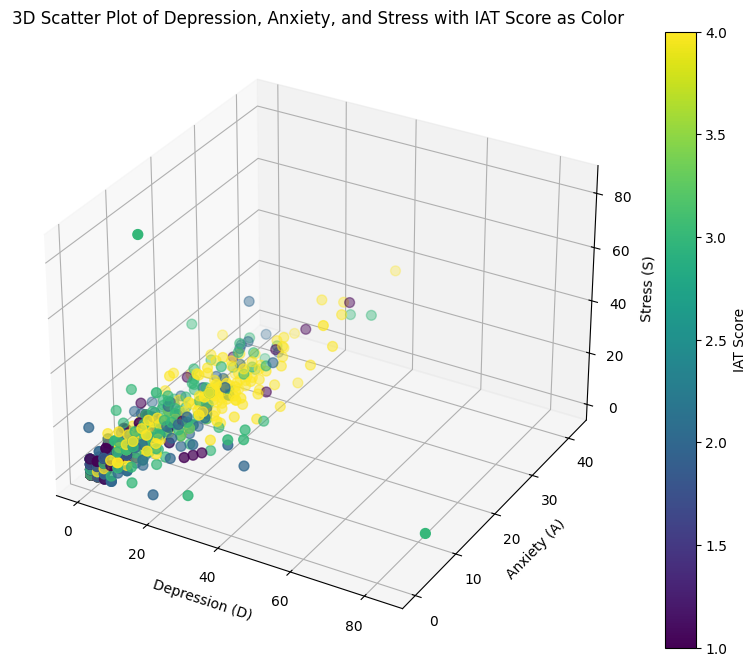

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Normalize iat_class for color mapping
norm = plt.Normalize(df['iat_class'].min(), df['iat_class'].max())
colors = plt.cm.viridis(norm(df['iat_class']))

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['Depression (D)'], df['Anxiety (A)'], df['Stress (S)'], c=colors, s=50)

# Add color bar
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax)
cbar.set_label('IAT Score')

# Labels
ax.set_xlabel('Depression (D)')
ax.set_ylabel('Anxiety (A)')
ax.set_zlabel('Stress (S)')
plt.title('3D Scatter Plot of Depression, Anxiety, and Stress with IAT Score as Color')

plt.show()


In [ ]:
import plotly.express as px

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(df,
                    x='Depression (D)',
                    y='Anxiety (A)',
                    z='Stress (S)',
                    color='iat_class',
                    color_continuous_scale='Viridis',
                    title='3D Scatter Plot of Depression, Anxiety, and Stress with IAT class as Color',
                    labels={
                        'Depression (D)': 'Depression',
                        'Anxiety (A)': 'Anxiety',
                        'Stress (S)': 'Stress',
                        'iat_class': 'IAT class'
                    })

fig.update_layout(scene=dict(
                    xaxis_title='Depression (D)',
                    yaxis_title='Anxiety (A)',
                    zaxis_title='Stress (S)'))

fig.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the model with cross-validation
cv_scores = cross_val_score(best_rf_model, X, y, cv=5)
print("Cross-validated accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Test set evaluation
y_pred = best_rf_model.predict(X_test)
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


Cross-validated accuracy: 39.04%
Test Accuracy: 46.43%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


# Step 3: Scale features for Logistic Regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],   # Regularization strength
    'solver': ['liblinear', 'lbfgs'],   # Solvers for optimization
    'penalty': ['l2']          # Regularization type
}

# Initialize and tune Logistic Regression with GridSearchCV
log_reg = LogisticRegression(max_iter=200, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best Logistic Regression model
best_log_reg = grid_search.best_estimator_

# Step 5: Evaluate the model with cross-validation on training data
cv_scores = cross_val_score(best_log_reg, X, y, cv=5)
print("Cross-validated accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Step 6: Evaluate on the test set
y_pred = best_log_reg.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


Cross-validated accuracy: 39.96%
Confusion Matrix:
[[ 0 31  1  4]
 [ 0 43  5  6]
 [ 0 23 12 13]
 [ 0 12 11 35]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        36
           2       0.39      0.80      0.53        54
           3       0.41      0.25      0.31        48
           4       0.60      0.60      0.60        58

    accuracy                           0.46       196
   macro avg       0.35      0.41      0.36       196
weighted avg       0.39      0.46      0.40       196

Test Accuracy: 45.92%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Count the occurrences of each class in 'iat_class'
class_counts = df['iat_class'].value_counts()
print(class_counts)


iat_class
2    187
3    178
4    175
1    113
Name: count, dtype: int64


Confusion Matrix (Clusters vs. True Labels):
[[  0   0   0   0   0]
 [ 79   3   9  22   0]
 [100   8  14  65   0]
 [ 55  13  40  70   0]
 [ 18  27  78  52   0]]
Adjusted Rand Index: 0.08


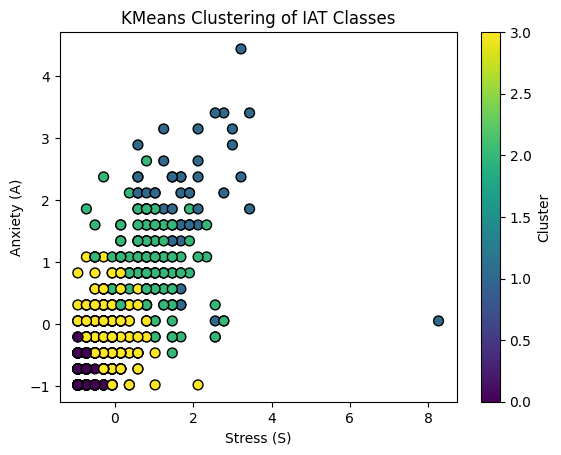

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'iat_class' is already created

# Step 1: Data Preparation
X = df[['Depression (D)', 'Anxiety (A)', 'Stress (S)']]  # Features for clustering
y = df['iat_class']  # True labels to compare (optional)

# Step 2: Scaling the features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans Clustering
n_clusters = len(y.unique())  # Number of clusters based on unique values in iat_class
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 4: Analyze Clustering Results
# Map the clusters to the `iat_class` labels to see if there's overlap
print("Confusion Matrix (Clusters vs. True Labels):")
print(confusion_matrix(y, clusters))

# Optional: Calculate Adjusted Rand Index for clustering quality (requires ground truth labels)
ari_score = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index: {ari_score:.2f}")

# Visualize the clusters in a scatter plot
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Stress (S)')
plt.ylabel("Anxiety (A)")
plt.title("KMeans Clustering of IAT Classes")
plt.colorbar(label="Cluster")
plt.show()


Confusion Matrix (Agglomerative Clustering vs. True Labels):
[[ 0  0  0  0  0]
 [27  6 78  2  0]
 [76 20 91  0  0]
 [83 40 51  4  0]
 [60 91 17  7  0]]
Silhouette Score: 0.39926409118111367


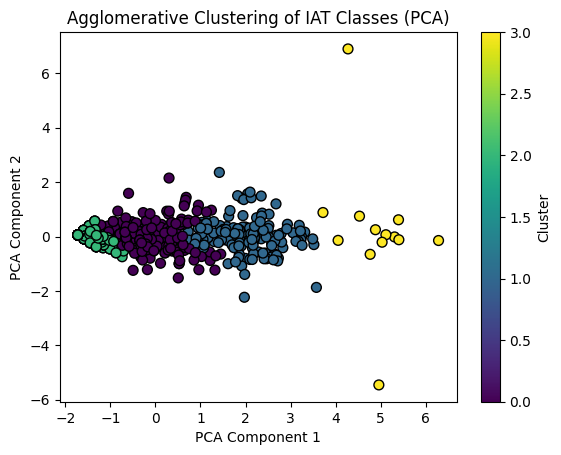

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Step 1: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 2: Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters_agg = agg_clustering.fit_predict(X_pca)

# Step 3: Evaluate Clustering Performance
print("Confusion Matrix (Agglomerative Clustering vs. True Labels):")
print(confusion_matrix(y, clusters_agg))
print("Silhouette Score:", silhouette_score(X_scaled, clusters_agg))

# Visualize PCA-based clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_agg, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Agglomerative Clustering of IAT Classes (PCA)")
plt.colorbar(label="Cluster")
plt.show()


Confusion Matrix (Agglomerative Clustering vs. True Labels):
[[ 0  0  0  0  0]
 [27  6 78  2  0]
 [76 20 91  0  0]
 [83 40 51  4  0]
 [60 91 17  7  0]]
Silhouette Score: 0.39926409118111367


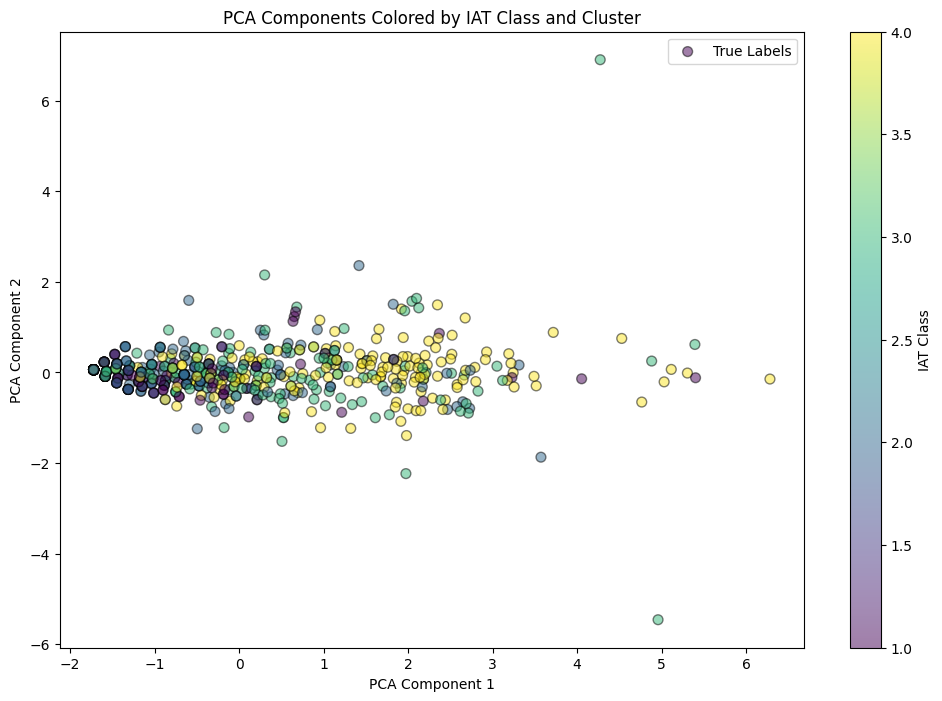

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, confusion_matrix

# Step 1: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 2: Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters_agg = agg_clustering.fit_predict(X_pca)

# Step 3: Evaluate Clustering Performance
print("Confusion Matrix (Agglomerative Clustering vs. True Labels):")
print(confusion_matrix(y, clusters_agg))
print("Silhouette Score:", silhouette_score(X_scaled, clusters_agg))

# Step 4: Visualize PCA-based clusters with true labels
plt.figure(figsize=(12, 8))

# Scatter plot for PCA components colored by iat_class
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.5, label='True Labels')

# Add the cluster centers to the plot, colored by clusters
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_agg, cmap='plasma', marker='x', alpha=0.3, s=100, label='Clusters')

# Add legend and titles
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Components Colored by IAT Class and Cluster")
plt.colorbar(scatter, label='IAT Class')
plt.legend()
plt.show()


Confusion Matrix (Agglomerative Clustering vs. True Labels):
[[  0   0   0   0   0]
 [ 19   9  84   1   0]
 [ 61  20 106   0   0]
 [ 75  37  63   3   0]
 [ 50  93  26   6   0]]
Silhouette Score: 0.4410144300896964


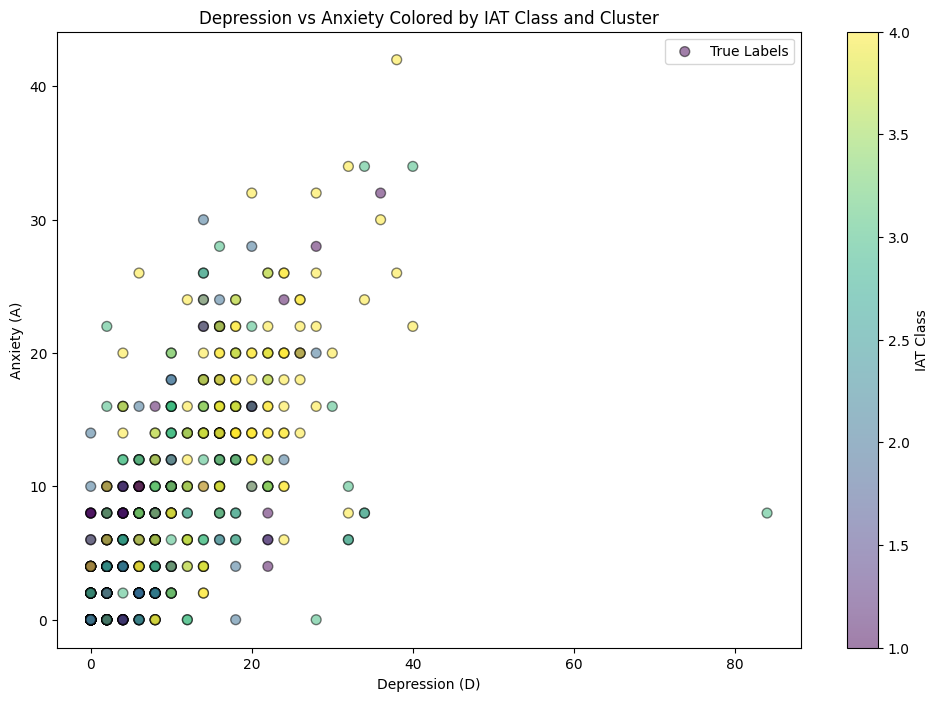

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, confusion_matrix

# Step 1: Prepare the features
X_features = df[['Depression (D)', 'Anxiety (A)']]

# Step 2: Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters_agg = agg_clustering.fit_predict(X_features)

# Step 3: Evaluate Clustering Performance
print("Confusion Matrix (Agglomerative Clustering vs. True Labels):")
print(confusion_matrix(y, clusters_agg))
print("Silhouette Score:", silhouette_score(X_features, clusters_agg))

# Step 4: Visualize the clusters with Depression and Anxiety
plt.figure(figsize=(12, 8))

# Scatter plot for Depression vs. Anxiety colored by true IAT class
scatter = plt.scatter(X_features['Depression (D)'], X_features['Anxiety (A)'], c=y, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.5, label='True Labels')

# Overlay the clusters
# plt.scatter(X_features['Depression (D)'], X_features['Anxiety (A)'], c=clusters_agg, cmap='plasma', marker='x', alpha=0.3, s=100, label='Clusters')

# Add legend and titles
plt.xlabel("Depression (D)")
plt.ylabel("Anxiety (A)")
plt.title("Depression vs Anxiety Colored by IAT Class and Cluster")
plt.colorbar(scatter, label='IAT Class')
plt.legend()
plt.show()


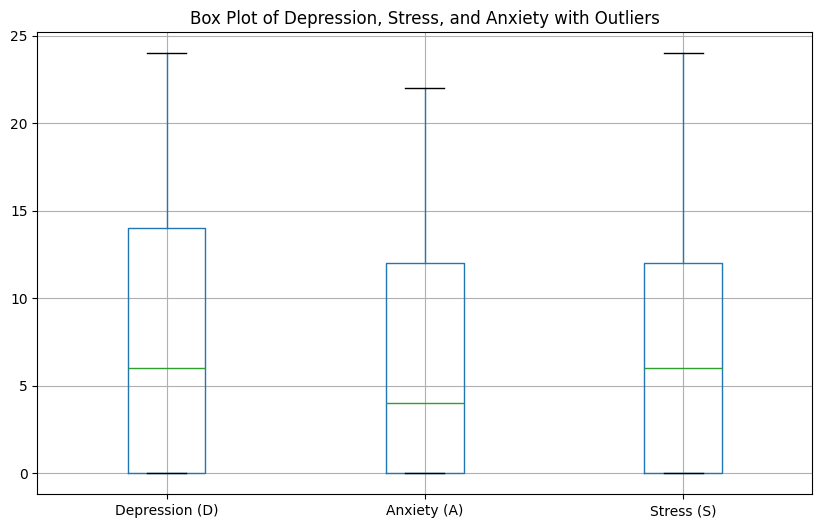

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame with 'depression', 'stress', 'anxiety', and 'iat_score' columns.
# This will create a box plot for each feature in X (depression, stress, anxiety).

plt.figure(figsize=(10, 6))
data_winsorized[['Depression (D)', 'Anxiety (A)', 'Stress (S)']].boxplot()
plt.title('Box Plot of Depression, Stress, and Anxiety with Outliers')
plt.show()


In [ ]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

# Removing outliers from depression, stress, and anxiety columns
data_no_outliers = df.copy()
for col in ['Depression (D)', 'Anxiety (A)', 'Stress (S)']:
    data_no_outliers = remove_outliers(data_no_outliers, col)


In [ ]:
# Features and target
X = data_no_outliers[['Depression (D)', 'Anxiety (A)', 'Stress (S)']]
y = data_no_outliers['iat_score']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 298.3140825022001
R-squared: 0.30615099815175795


In [ ]:
from scipy.stats.mstats import winsorize

# Winsorizing columns to cap extreme values
data_winsorized = df.copy()
for col in ['Depression (D)', 'Anxiety (A)', 'Stress (S)']:
    data_winsorized[col] = winsorize(df[col], limits=[0.05, 0.05])

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Initialize XGBoost regressor with basic parameters
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)

# Fit the model to the training data
xg_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict on the test set
y_pred = xg_reg.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 315.76024831757763
R-squared: 0.2655729448612656


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [ ]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (1 output)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 1214.7836 - mae: 28.9395 - val_loss: 841.8277 - val_mae: 22.0915
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 962.3170 - mae: 24.9524 - val_loss: 443.2263 - val_mae: 15.5244
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 495.4218 - mae: 16.4693 - val_loss: 436.6256 - val_mae: 15.4943
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 490.4860 - mae: 16.3315 - val_loss: 431.5866 - val_mae: 15.5139
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 413.5523 - mae: 14.8861 - val_loss: 427.1699 - val_mae: 15.6111
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 441.9688 - mae: 15.3163 - val_loss: 422.2466 - val_mae: 15.7642
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 462.7867 - mae: 16.1389 - val_loss: 417.4388 - val_mae: 15.8859
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 361.6727 - mae: 14.6186 - val_loss: 412.6435 - val_mae: 16.0309
Epoch 9/100
29

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test).flatten()  # Flatten to make it a 1D array

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
Mean Squared Error: 309.6374178794443
R-squared: 0.27981404186999814
